<img src="https://www.highereducationdigest.com/wp-content/uploads/2021/03/IIIT-B-Upgrad.jpg" class = "center" width = "240" height="360" />



# LINEAR REGRESSION ASSIGNMENT- Bike Sharing Dataset
                                                             

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Description and Data Loading](#section2)<br>
3. [Data cleaning](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Linear Regression](#section5)<br>
6. [Feature Selection](#section7)<br>
7. [Model evaluation](#section6)<br>


# 1. Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Objective:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

# 2. Data Description and Data Loading

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [227]:
# Import the following Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing Necessary Librarires for Regression
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from math import sqrt
from statsmodels.stats.stattools import durbin_watson

In [9]:
Bike_data=pd.read_csv("day.csv")

In [10]:
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
Bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3. Data Clenaing

In [ ]:
## Replacing and changing column data types for the belown columns in Bike Data
Bike_data['season'] = Bike_data['season'].astype(str)
Bike_data['weathersit'] = Bike_data['weathersit'].astype(str)


In [15]:
## Replacing the values of the below column to a more suitable naming convention
Bike_data['season'].replace({'1':'spring', '2':'summer','3':'fall','4':'winter'},inplace = True)
Bike_data['weathersit'].replace({'1':'Clear','2':'Mist','3':'Light Snow','4':'Heavy Rain'},inplace = True)
Bike_data.weekday.replace((0,1,2,3,4,5,6),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)
Bike_data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [16]:
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


###  Dropping 'instant' and 'dteday' column
- Dropping columns instant and dteday since both the columns wont impact our model in anyway. We have mnth and yr column as sepearate entity

In [18]:
Bike_data.drop(['instant','dteday'], axis=1,inplace = True)
Bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
Bike_data.rename(columns={'Month':'month','Year':'year','Humidity':'humidity'},inplace = True)
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 4. Exploratory Data Analysis

In [23]:
Bike_data['year'] = Bike_data['year'].astype(str) 
Bike_data['year'].replace({'0':'2018','1':'2019'},inplace = True)
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt,yearr
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


In [24]:
Bike_data.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [25]:
Bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

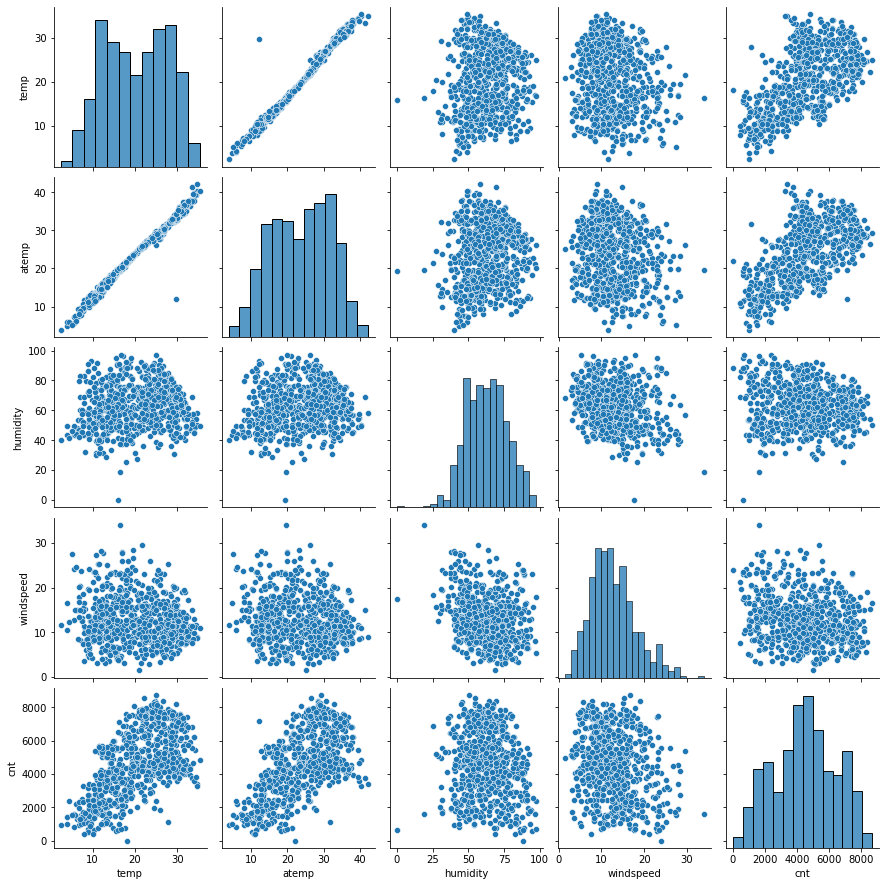

In [26]:
sns.pairplot(Bike_data[['weathersit','temp','atemp','humidity','windspeed','cnt']])
plt.show()

In [27]:
Bike_data.drop(['yearr'], axis=1,inplace = True)
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  Total Number of Registered and Causal Bike for different months

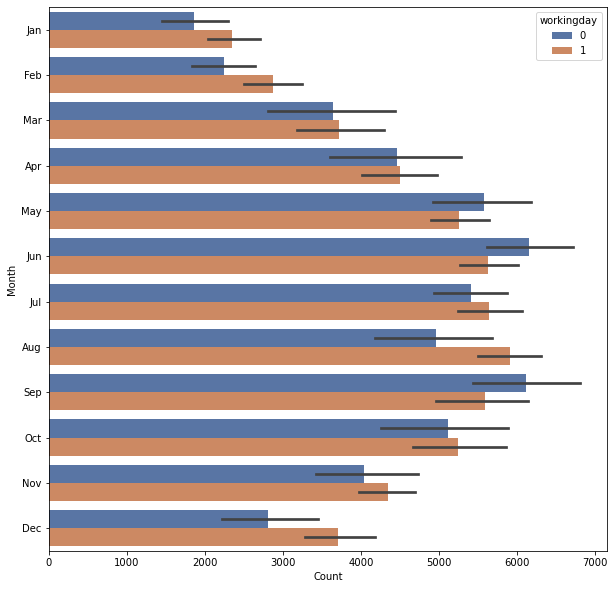

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(data =Bike_data,x='cnt', y='month', hue ='workingday',palette="deep")
plt.xlabel('Count')
plt.ylabel('Month')
plt.show()

In [32]:
Bike_data.cnt

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [34]:
bike_pivot=pd.pivot_table(Bike_data,values='cnt',columns='year',index='month',aggfunc=np.sum)

In [35]:
bike_pivot

year,2018,2019
month,,
Apr,94870,174224
Aug,136691,214503
Dec,87323,123713
Feb,48215,101303
Jan,38189,96744
Jul,141341,203607
Jun,143512,202830
Mar,64045,164875
May,135821,195865


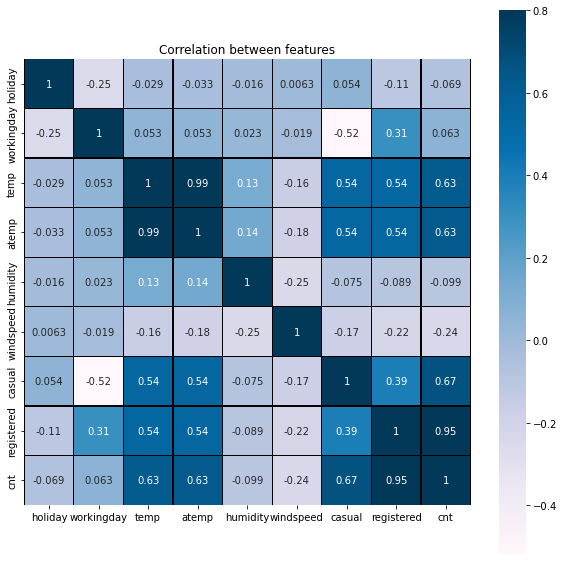

In [39]:
corr = Bike_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='PuBu',linecolor ='black')
plt.title('Correlation between features')
plt.show()

### Observation
- From the above heatmap we can see between __cnt,temp and atemp__.
- We can see remove __casual and registered__ column. Since __cnt__ includes both the columns

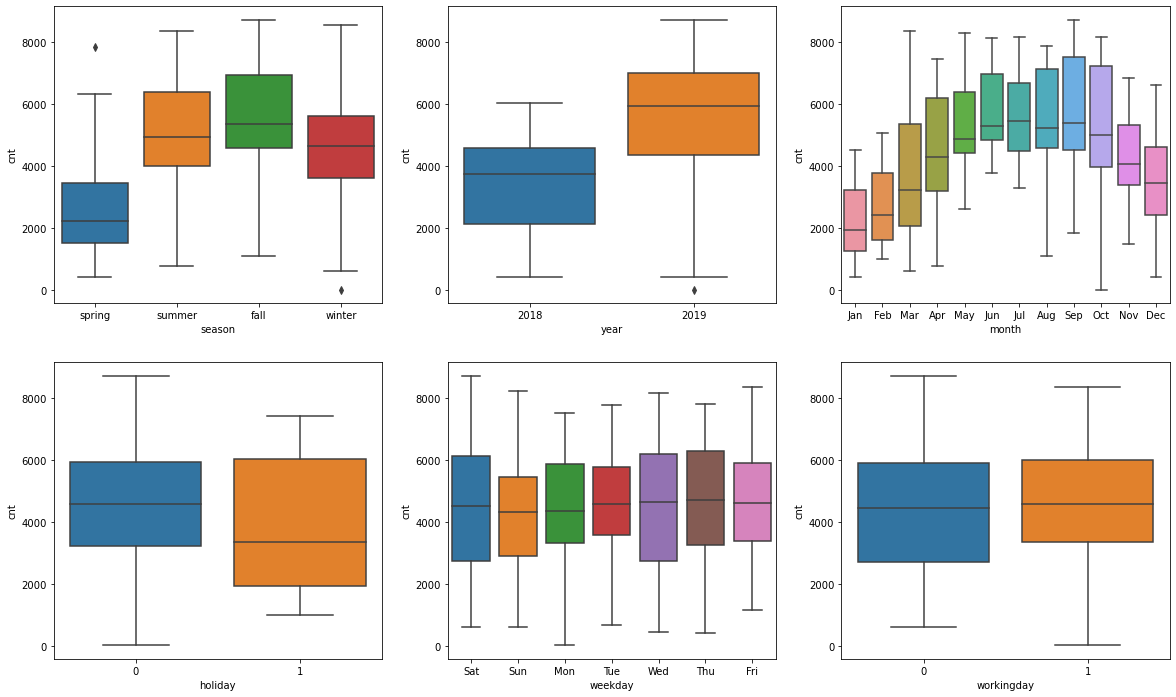

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = Bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = Bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_data)
plt.show()

In [42]:
func=lambda x: 100*x.sum()/Bike_data['cnt'].sum()

In [44]:
pd.pivot_table(Bike_data,values='cnt',columns='year',index='weekday',aggfunc=func)

year,2018,2019
weekday,,
Fri,5.530677,9.291960
Mon,5.476435,8.365086
Sat,5.461910,9.057370
Sun,5.380806,8.111989
Thu,5.304170,9.445689
Tue,5.479991,8.774980
Wed,5.140595,9.178342


In [45]:
pd.pivot_table(Bike_data,values='cnt',columns='season',index='weekday',aggfunc=func)

season,fall,spring,summer,winter
weekday,,,,
Fri,4.718150,2.256685,4.126357,3.721445
Mon,4.445879,1.937831,3.745391,3.712420
Sat,4.582227,1.995627,4.214389,3.727037
Sun,4.206549,1.829165,3.939718,3.517364
Thu,4.848633,2.198675,4.108580,3.593971
Tue,4.640601,2.121431,3.812060,3.680878
Wed,4.802839,1.927864,3.966975,3.621258


In [46]:
pd.pivot_table(Bike_data,values='cnt',columns='season',index='weekday',aggfunc=np.sum)

season,fall,spring,summer,winter
weekday,,,,
Fri,155267,74264,135792,122467
Mon,146307,63771,123255,122170
Sat,150794,65673,138689,122651
Sun,138431,60195,129650,115751
Thu,159561,72355,135207,118272
Tue,152715,69813,125449,121132
Wed,158054,63443,130547,119170


### Observation: 
- Based on the above pivot tables we can see __Fall__ has the highest number of bike sharing rentals
- Based on the above pivot tables we can see __Spring__ has the least number of bike sharing rentals

Text(0.5, 0, 'Season')

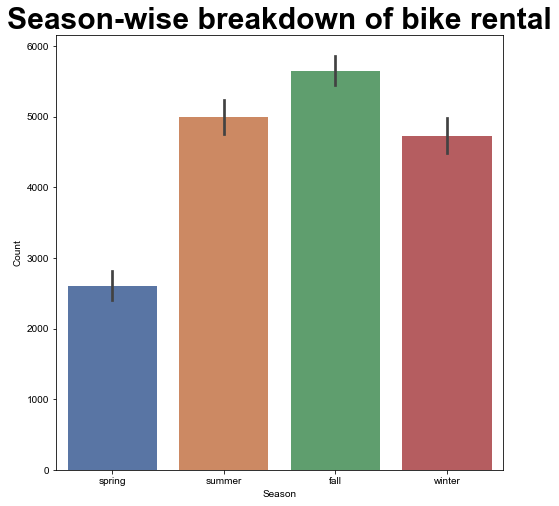

In [64]:
# Barplot for season wise analysis of bike rentals
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = "season", y = "cnt", data =Bike_data,palette="deep", ax=ax)
plt.title('Season-wise breakdown of bike rental', fontsize = 30, fontweight ='bold')
sns.set_style('darkgrid')
plt.ylabel('Count')
plt.xlabel('Season')

Text(0.5, 1.0, 'Monthly rentals based on the year 2018 and 2019')

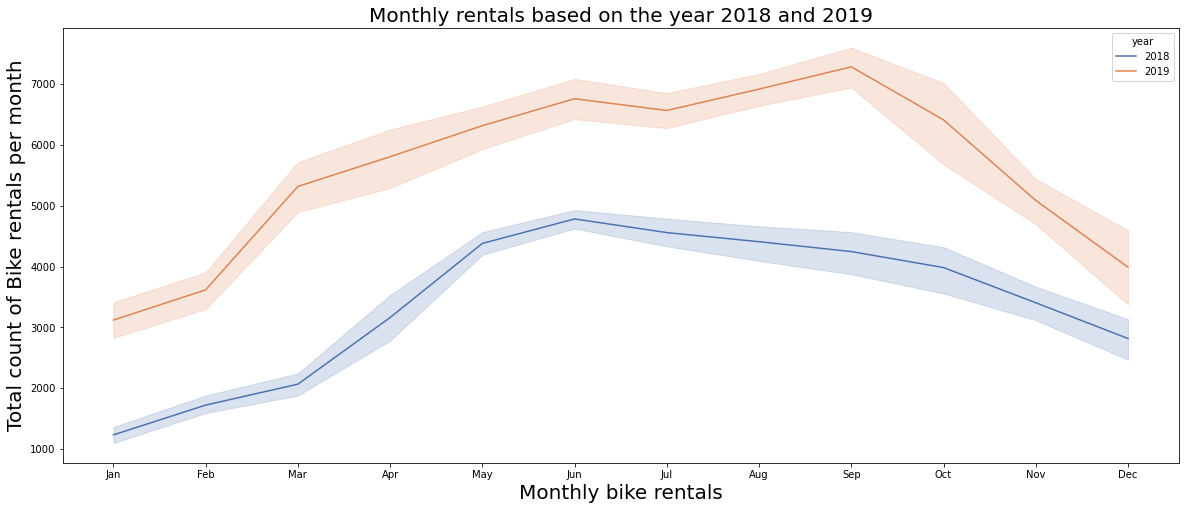

In [53]:
#Line plot for analysing bike rentals with month and year
fig,ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=Bike_data[['month','cnt','year']], x='month',y='cnt', hue='year',ax=ax,palette="deep")
plt.ylabel('Total count of Bike rentals per month',fontsize = 20)
plt.xlabel('Monthly bike rentals',fontsize = 20)
plt.title('Monthly rentals based on the year 2018 and 2019', fontsize = 20)

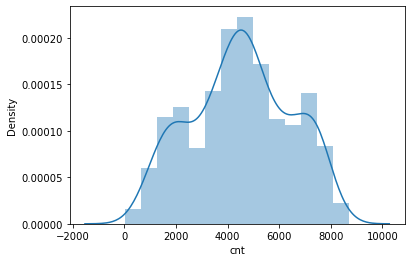

In [60]:
sns.distplot(Bike_data.cnt)

Text(0.5, 1.0, 'Weather based bikerental')

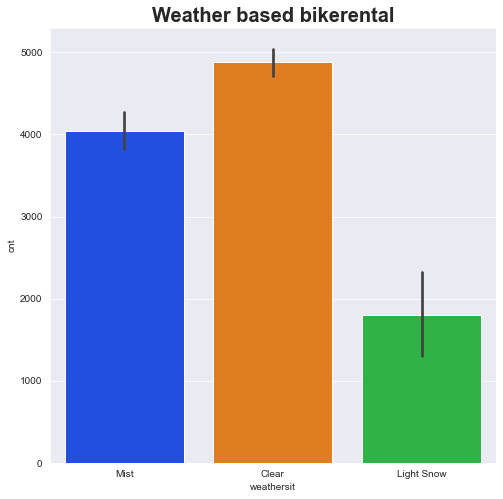

In [65]:
# Barplot for weather wise analysis of bike rentals
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = "weathersit", y = "cnt", data =Bike_data,palette="bright", ax=ax)
sns.set_style('darkgrid')
plt.title('Weather based bikerental', fontsize = 20, fontweight ='bold')

In [66]:
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating a regplot for cnt vs temp and humidity

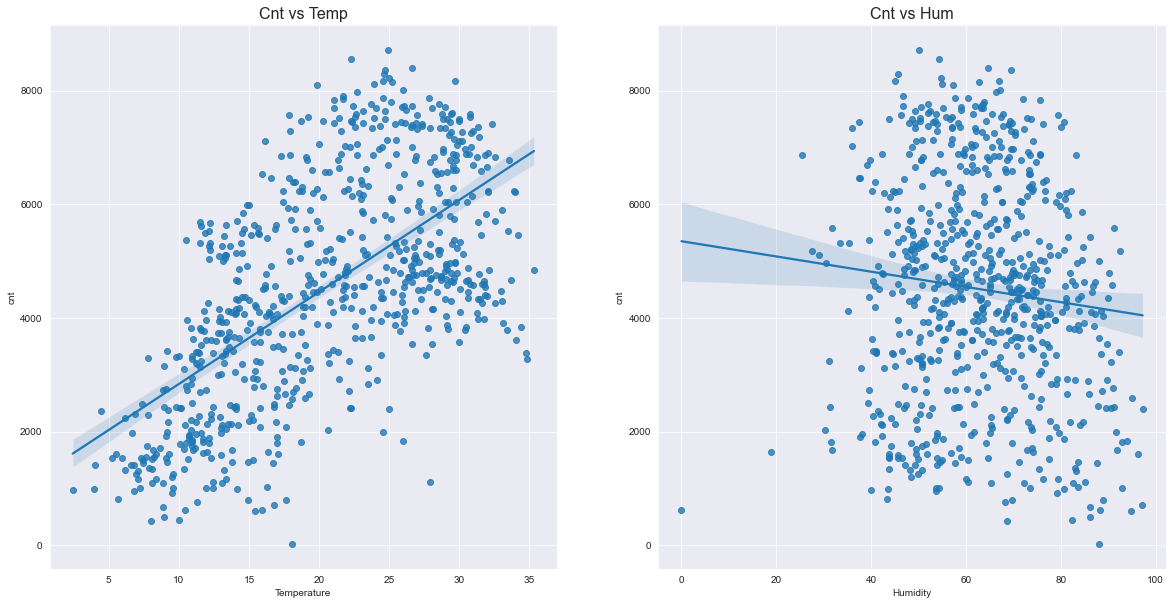

In [77]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=Bike_data,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.subplot(1,2,2)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=Bike_data,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

### Obseravtion
- From the above reg plot we can see that __cnt vs tempearature is increasing with increasing tempearture__ while __cnt vs Humidity is decreasing with increasing humidity__. 

### Dummy Variables
- Creating dummy variables for __month,weekday,weathersit and season__. 

In [84]:
bike_data_dummy_1=pd.get_dummies(Bike_data, columns = ['season','weathersit'])

- Dropping first columns for weekday and month
- Not dropping columns for season and weather. Since need info on season and weather impact on bike rentals

In [90]:
bike_data_dummy_2=pd.get_dummies(bike_data_dummy_1, columns = ['month','weekday'],drop_first = True)

In [91]:
bike_data_dummy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   730 non-null    object 
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   humidity               730 non-null    float64
 6   windspeed              730 non-null    float64
 7   casual                 730 non-null    int64  
 8   registered             730 non-null    int64  
 9   cnt                    730 non-null    int64  
 10  season_fall            730 non-null    uint8  
 11  season_spring          730 non-null    uint8  
 12  season_summer          730 non-null    uint8  
 13  season_winter          730 non-null    uint8  
 14  weathersit_Clear       730 non-null    uint8  
 15  weathe

In [96]:
bike_data_updated = bike_data_dummy_2.replace({'year':{'2018':'0','2019':'1'}})

In [147]:
bike_data_updated['year']=bike_data_updated['year'].astype(str).astype(int)

In [98]:
bike_data_dummy_2.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt,...,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,1,0,0,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,1,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,1,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


# 5. Linear Regression
### Splitting data into train and test

In [148]:
bike_data_updated.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'], dtype='object')

In [149]:
#re-ordering the fields of our dataset as per our requiremnt
data_bike_new = bike_data_updated[['year','month_Jan','month_Feb','month_Mar','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec','weekday_Mon','weekday_Tue','weekday_Wed','weekday_Thu','weekday_Sat', 'weekday_Sun','season_fall',       'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear',       'weathersit_Light Snow', 'weathersit_Mist','holiday', 'workingday', 'temp', 'atemp', 'humidity','windspeed', 'casual', 'registered', 'cnt']]
data_bike_new.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,cnt
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [150]:
data_bike_new.drop(['casual','registered'], axis=1,inplace = True)
data_bike_new.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


- Dropping Casual and Registered column since Cnt has the total of both these columns

In [151]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   510 non-null    int32  
 1   month_Jan              510 non-null    uint8  
 2   month_Feb              510 non-null    uint8  
 3   month_Mar              510 non-null    uint8  
 4   month_May              510 non-null    uint8  
 5   month_Jun              510 non-null    uint8  
 6   month_Jul              510 non-null    uint8  
 7   month_Aug              510 non-null    uint8  
 8   month_Sep              510 non-null    uint8  
 9   month_Oct              510 non-null    uint8  
 10  month_Nov              510 non-null    uint8  
 11  month_Dec              510 non-null    uint8  
 12  weekday_Mon            510 non-null    uint8  
 13  weekday_Tue            510 non-null    uint8  
 14  weekday_Wed            510 non-null    uint8  
 15  weekd

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   219 non-null    int32  
 1   month_Jan              219 non-null    uint8  
 2   month_Feb              219 non-null    uint8  
 3   month_Mar              219 non-null    uint8  
 4   month_May              219 non-null    uint8  
 5   month_Jun              219 non-null    uint8  
 6   month_Jul              219 non-null    uint8  
 7   month_Aug              219 non-null    uint8  
 8   month_Sep              219 non-null    uint8  
 9   month_Oct              219 non-null    uint8  
 10  month_Nov              219 non-null    uint8  
 11  month_Dec              219 non-null    uint8  
 12  weekday_Mon            219 non-null    uint8  
 13  weekday_Tue            219 non-null    uint8  
 14  weekday_Wed            219 non-null    uint8  
 15  weekd

In [110]:

pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [154]:
df_train.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed,cnt
653,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


## Re-Scaling Features in the Dataset

In [155]:
scaler = MinMaxScaler()


num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [156]:
df_train.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed,cnt
653,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


## Splitting Train data into X and y train

In [157]:
y_train = df_train.pop('cnt')
X_train = df_train

In [158]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   510 non-null    int32  
 1   month_Jan              510 non-null    uint8  
 2   month_Feb              510 non-null    uint8  
 3   month_Mar              510 non-null    uint8  
 4   month_May              510 non-null    uint8  
 5   month_Jun              510 non-null    uint8  
 6   month_Jul              510 non-null    uint8  
 7   month_Aug              510 non-null    uint8  
 8   month_Sep              510 non-null    uint8  
 9   month_Oct              510 non-null    uint8  
 10  month_Nov              510 non-null    uint8  
 11  month_Dec              510 non-null    uint8  
 12  weekday_Mon            510 non-null    uint8  
 13  weekday_Tue            510 non-null    uint8  
 14  weekday_Wed            510 non-null    uint8  
 15  weekd

In [159]:
X_train.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed
653,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0.509887,0.501133,0.575354,0.300794
576,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0.245101,0.200348,0.498067,0.663106
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475


In [160]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Selecting features and  training models using RFE

In [161]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [162]:
## Cutting down features to top 16
rfe = RFE(lr,16)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=16)

In [121]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('month_Jan', False, 4),
 ('month_Feb', False, 9),
 ('month_Mar', False, 15),
 ('month_May', False, 11),
 ('month_Jun', False, 12),
 ('month_Jul', False, 2),
 ('month_Aug', False, 5),
 ('month_Sep', True, 1),
 ('month_Oct', False, 3),
 ('month_Nov', False, 14),
 ('month_Dec', False, 10),
 ('weekday_Mon', False, 7),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 16),
 ('weekday_Thu', False, 13),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [163]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['year', 'month_Sep', 'weekday_Sat', 'weekday_Sun', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed'], dtype='object')

In [164]:
X_train.columns[~rfe.support_]

Index(['month_Jan', 'month_Feb', 'month_Mar', 'month_May', 'month_Jun', 'month_Jul', 'month_Aug', 'month_Oct', 'month_Nov', 'month_Dec', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'atemp'], dtype='object')

### Creating Functions for Linear Model 

In [165]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [166]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [167]:
X_train_bike_data = X_train[rfe_features]

In [168]:
X_train_bike_data.head()

,year,month_Sep,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,humidity,windspeed
653,1,0,0,0,0,0,0,1,1,0,0,0,1,0.509887,0.575354,0.300794
576,1,0,0,0,1,0,0,0,1,0,0,0,1,0.815169,0.725633,0.264686
426,1,0,1,0,0,1,0,0,0,0,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,1,0,1,0,0,1,0,0,0,0,0.245101,0.498067,0.663106
482,1,0,1,0,0,0,1,0,0,0,1,0,0,0.395666,0.504508,0.188475


In [169]:
rfe_features

Index(['year', 'month_Sep', 'weekday_Sat', 'weekday_Sun', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed'], dtype='object')

In [170]:
columns=['year', 'month_Sep', 'weekday_Sat', 'weekday_Sun', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed']

In [171]:
X_train_bike_data.head()

,year,month_Sep,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,humidity,windspeed
653,1,0,0,0,0,0,0,1,1,0,0,0,1,0.509887,0.575354,0.300794
576,1,0,0,0,1,0,0,0,1,0,0,0,1,0.815169,0.725633,0.264686
426,1,0,1,0,0,1,0,0,0,0,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,1,0,1,0,0,1,0,0,0,0,0.245101,0.498067,0.663106
482,1,0,1,0,0,0,1,0,0,0,1,0,0,0.395666,0.504508,0.188475


### Stats Model 1

In [172]:
build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.23e-191
Time:                        07:54:37   Log-Likelihood:                 513.16
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     496   BIC:                            -939.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

__Observation__<br/>
- We need to have a low P-value for a good model.
  - season_fall has highest P-value of __0.386__.
  
- VIF should be less than 5.
  - Here, we have some variables that has higher VIF.
  
- Let us first drop the variable which has high P-value. 

## Stats Model 2

In [173]:
## Dropping Season_fall from the list of columns
columns=['year', 'month_Sep', 'weekday_Sat', 'weekday_Sun', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed']

build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.23e-191
Time:                        08:12:10   Log-Likelihood:                 513.16
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     496   BIC:                            -939.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

## Stats Model 3

In [174]:
## Dropping  'weekday_Sun' from the list of columns
columns=['year', 'month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Clear', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed']

build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.23e-191
Time:                        08:13:47   Log-Likelihood:                 513.16
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     496   BIC:                            -939.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

## Stats Model 4

In [175]:
## Dropping  ''weathersit_Clear'' from the list of columns
columns=['year', 'month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed']

build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.23e-191
Time:                        08:20:31   Log-Likelihood:                 513.16
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     496   BIC:                            -939.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

## Stats Model 5

In [176]:
## Dropping  'humidity' from the list of columns for High VIF value and negative co-efficient
columns=['year', 'month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'windspeed']

build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.48e-188
Time:                        08:22:59   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

## Stats Model 6

In [177]:
## Dropping  'holiday' from the list of columns for high p-value which is insignificant
columns=['year', 'month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'workingday', 'temp', 'windspeed']

build_model(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          6.86e-189
Time:                        08:29:39   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

__Observation__<br/>
- From the above model,
  - __P-value__ less than 0.05 for all the features
  - __VIF__ less than 5 for all except temp.
  - __VIF__ for temp is 5.48. We can Keep this since the other features has a good p-value
  - __R-squared of 83.5%__

## Model Equation

- Equation of the model is given below
  - __cnt = 0.1405 + 0.2343 `*` Year + 0.0872`*`Month_sep + 0.0669`*`weekday_Sat - 0.0551`*`season_spring + 0.0615`*`season_summer - 0.0972`*`season_winter - 0.2902`*`weathersit_Light -0.0817`*`weathersit_Mist + 0.0557`*`workingday + 0.48`*`temp - 0.1501`*`windspeed__ 

In [ ]:
columns=['year', 'month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'workingday', 'temp', 'windspeed']

In [179]:
X_train_bike_data_pred=X_train_bike_data[columns]

In [181]:
#Creating Constant
X_train_bike_model = sm.add_constant(X_train_bike_data_pred)

# Create a seventh fitted model
bike_final_model= sm.OLS(y_train, X_train_bike_model).fit()

In [182]:
y_train_pred=bike_final_model.predict(X_train_bike_model)

Text(0.5, 0, 'Errors')

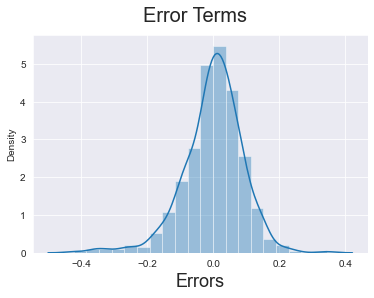

In [183]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

### Error Terms are Normally Distributed

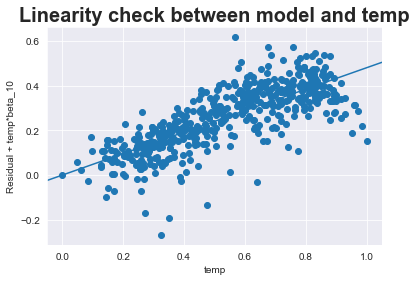

In [185]:
sm.graphics.plot_ccpr(bike_final_model, 'temp')
plt.title("Linearity check between model and temp",fontsize=20,fontweight="bold")
plt.show()

- Our model has a linear relationship with independent variales

### Homoscedasticity

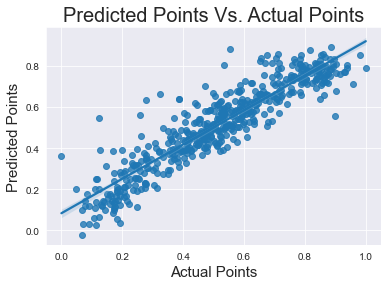

In [186]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

- From the above plot we can observe that all the data points have equal variance and no data points are not clustered around similar regions they are all equally spread.

__Multicollinearity Check__

In [187]:
get_vif(columns)

                 Features   VIF
9                    temp  5.48
8              workingday  4.65
10              windspeed  4.63
3           season_spring  2.30
0                    year  2.07
4           season_summer  1.99
2             weekday_Sat  1.83
5           season_winter  1.77
7         weathersit_Mist  1.56
1               month_Sep  1.23
6   weathersit_Light Snow  1.08


### No autocorrelation of errors
- There should not be any auto correlation of errors. Error terms in linear regression should be independent. 
- Durbin Watson test is used to check autocorrelation.
- Value obtained from Durbin Watson test should be in the range 1.8 to 2.2
- Values exceeding 2.2 indicates negative autocorrelation.

In [228]:
durbin_watson(bike_final_model.resid)

2.073476227763845

- Above durbin watson value is 2.07. Which can also be seen in our model. This shows therie is no autocorrelation of errors

## Testing Linear Regression Model

In [191]:
num_vars_test = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars_test] = scaler.transform(df_test[num_vars_test])

In [192]:
df_test.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed,cnt
184,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


## Splitting Test Dataset

In [193]:
y_test = df_test.pop('cnt')
X_test = df_test

In [194]:
X_test.head()

,year,month_Jan,month_Feb,month_Mar,month_May,month_Jun,month_Jul,month_Aug,month_Sep,month_Oct,month_Nov,month_Dec,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,weekday_Sun,season_fall,season_spring,season_summer,season_winter,weathersit_Clear,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,atemp,humidity,windspeed
184,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.831783,0.769660,0.657364,0.084219
535,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0.901354,0.842587,0.610133,0.153728
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0.511964,0.496145,0.837699,0.334206
221,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [195]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
404    0.438104
198    0.510354
171    0.553728
512    0.692706
200    0.495858
509    0.772204
559    0.799241
109    0.451220
467    0.733548
339    0.295904
589    0.789347
222    0.548780
40     0.174413
682    0.629659
453    0.625518
606    0.884837
265    0.273010
510    0.749425
19     0.219167
117    0.464335
423    0.499425
614    0.860792
163    0.575012
630    0.907156
191    0.467556
572    0.791763
662    0.844110
264    0.549126
625    0.466061
325    0.182352
114    0.466061
218    0.432927
678    0.749425
24     0.225840
432    0.523125
395    0.516222
48     0.334215
684    0.653014
203    0.375403
450    0.584445
538    0.855499
73     0.234008
269    0.471468
710    0.609411
98     0.279913
530    0.879314
173    0.548550
418    0.579844
503    0.951680
727    0.151749
550    0.715486
714    0.433042
448    0.572250
248    0.309250
685    0.645076
410    0.477105
201    0.432812
41     0

In [196]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   219 non-null    int32  
 1   month_Jan              219 non-null    uint8  
 2   month_Feb              219 non-null    uint8  
 3   month_Mar              219 non-null    uint8  
 4   month_May              219 non-null    uint8  
 5   month_Jun              219 non-null    uint8  
 6   month_Jul              219 non-null    uint8  
 7   month_Aug              219 non-null    uint8  
 8   month_Sep              219 non-null    uint8  
 9   month_Oct              219 non-null    uint8  
 10  month_Nov              219 non-null    uint8  
 11  month_Dec              219 non-null    uint8  
 12  weekday_Mon            219 non-null    uint8  
 13  weekday_Tue            219 non-null    uint8  
 14  weekday_Wed            219 non-null    uint8  
 15  weekd

In [198]:
X_train_bike_model.head()

,const,year,month_Sep,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,workingday,temp,windspeed
653,1.0,1,0,0,0,0,1,0,0,1,0.509887,0.300794
576,1.0,1,0,0,0,0,0,0,0,1,0.815169,0.264686
426,1.0,1,0,1,1,0,0,0,1,0,0.442393,0.255342
728,1.0,1,0,0,1,0,0,0,0,0,0.245101,0.663106
482,1.0,1,0,1,0,1,0,0,1,0,0.395666,0.188475


In [211]:
# Now let's use our model to make predictions.
X_train_bike_model_test=X_train_bike_model.drop(['const'],axis=1)

# Creating X_test_new dataframe from train features
X_test_new = X_test[X_train_bike_model_test.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [213]:
# Making predictions
y_pred_test = bike_final_model.predict(X_test_new)

### 7. Model Evaluation

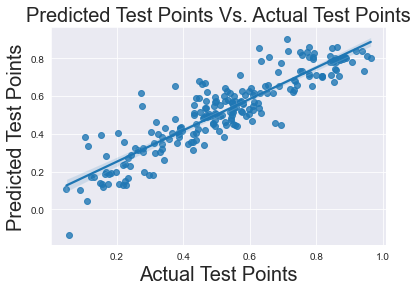

In [216]:
corr_plot = sns.regplot(x=y_test, y=y_pred_test)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 20})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 20})
plt.show()

In [219]:
# Evaluation
r_square = r2_score(y_test,y_pred_test)
print(r_square)

0.8058786233591085


- From the above result we can see the  __R-Squared for test set is 80.58%__.

In [221]:
adjusted_r_square = 1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1)
print(adjusted_r_square)

0.7945705820013867


In [226]:
## Root Mean Square Error
rmse = sqrt(mean_squared_error(y_test, y_pred_test))
print(rmse)

0.09602057937132373


- __Adjusted R-Square for the test set is 79.45%.__

### Conclusion

- Our current model has an overall good accuracy. 
- Evaluating our model with test data gave us good values for 
  - __*R-Squared          : 0.8058*__
  - __*Adjusted R-squared : 0.7945*__
  - __*RMSE               : 0.096*__
- Equation of the Model
- __cnt = 0.1405 + 0.2343 `*` Year + 0.0872`*`Month_sep + 0.0669`*`weekday_Sat - 0.0551`*`season_spring + 0.0615`*`season_summer - 0.0972`*`season_winter - 0.2902`*`weathersit_Light_Snow -0.0817`*`weathersit_Mist + 0.0557`*`workingday + 0.48`*`temp - 0.1501`*`windspeed__ 
- Important Features for __increasing cnt of Rental Bikes__
    - __Month_sep__
    - __Saturday_Weekday__
    - __Season_Summer__
    - __Workingday__
    - __Temperature of the day__
- Features that __negatively affect the overall cnt of rental bikes__
    - __spring_season__
    - __summer_season__
    - __winter_season__
    - __Light Snow Weather__
    - __Mist Weather situation__
    - __windspeed__